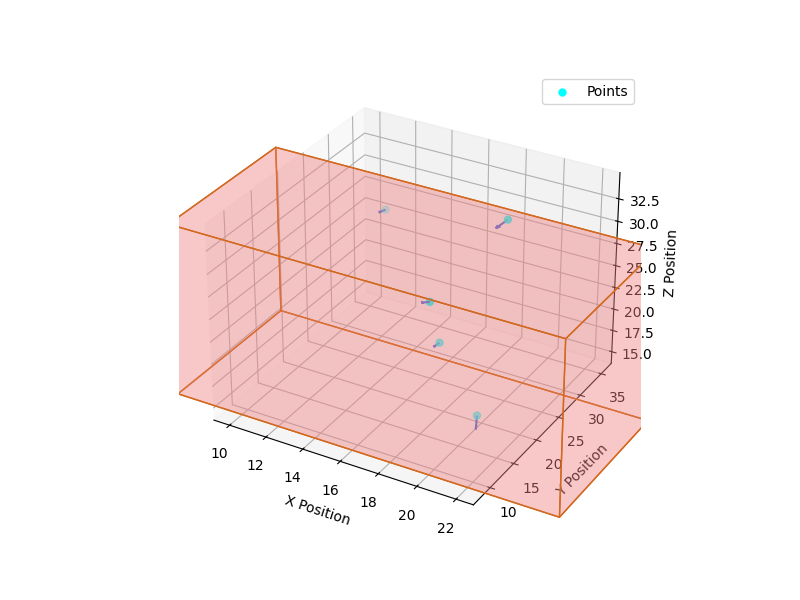

In [1]:
%matplotlib widget
import os

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

test = True

quiver_scale = .25 if test else 2e8
file_name = f"{os.getcwd()}/{"test_" if test else ""}input"

with open(file_name) as f:
    data = f.read()
    
positions, velocities = [], []
for line in data.splitlines():
    positions.append([int(num) for num in line.split(" @ ")[0].split(", ")])
    velocities.append([int(num) for num in line.split(" @ ")[1].split(", ")])


plt.gcf().clear()
plt.close()
fig = plt.figure(figsize=(8,6), dpi=100) if test else plt.figure(figsize=(24,18), dpi=50) 
ax = fig.add_subplot(111, projection="3d")

# Convert positions and velocities to NumPy arrays for easier handling
positions = np.array(positions)
velocities = np.array(velocities)

# Compute the magnitude of each velocity vector
magnitudes = np.sqrt(np.sum(velocities**2, axis=1))

# Scatter plot for points
ax.scatter(
    positions[:, 0],
    positions[:, 1],
    positions[:, 2],
    color="aqua",
    s=25,
    label="Points",
)

# Quiver plot for velocity vectors
for i in range(len(positions)):
    ax.quiver(
        *positions[i],
        *velocities[i],
        color="royalblue",
        length=quiver_scale * magnitudes[i],
        normalize=True
    )

# Region
xy_min = 7 if test else 2e14
xy_max = 27 if test else 4e14

x = np.array([xy_min, xy_max])
y = np.array([xy_min, xy_max])
z_min = np.min(positions[:, 2])  # Minimum Z from the data
z_max = np.max(positions[:, 2])  # Maximum Z from the data

# Create vertices for a rectangular prism (cube)
vertices = np.array(
    [
        [x[0], y[0], z_min],
        [x[0], y[1], z_min],
        [x[1], y[1], z_min],
        [x[1], y[0], z_min],
        [x[0], y[0], z_max],
        [x[0], y[1], z_max],
        [x[1], y[1], z_max],
        [x[1], y[0], z_max],
    ]
)

# Create sides of the cube, each side consists of 4 vertices
faces = [
    [vertices[j] for j in [0, 1, 2, 3]],
    [vertices[j] for j in [4, 5, 6, 7]],
    [vertices[j] for j in [0, 3, 7, 4]],
    [vertices[j] for j in [1, 2, 6, 5]],
    [vertices[j] for j in [0, 1, 5, 4]],
    [vertices[j] for j in [2, 3, 7, 6]],
]

# Create a 3D polygon collection
ax.add_collection3d(
    Poly3DCollection(
        faces, facecolors="lightcoral", linewidths=1, edgecolors="chocolate", alpha=0.25
    )
)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.legend()

if test:
    # Current axis limits
    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    # Calculate the range to expand
    x_range = xmax - xmin
    y_range = ymax - ymin
    
    # Increase range by 30%
    expand_x = x_range * 0.5
    expand_y = y_range * 0.5
    
    # Set new limits
    ax.set_xlim(xmin - expand_x / 2, xmax + expand_x / 2)
    ax.set_ylim(ymin - expand_y / 2, ymax + expand_y / 2)


plt.show()